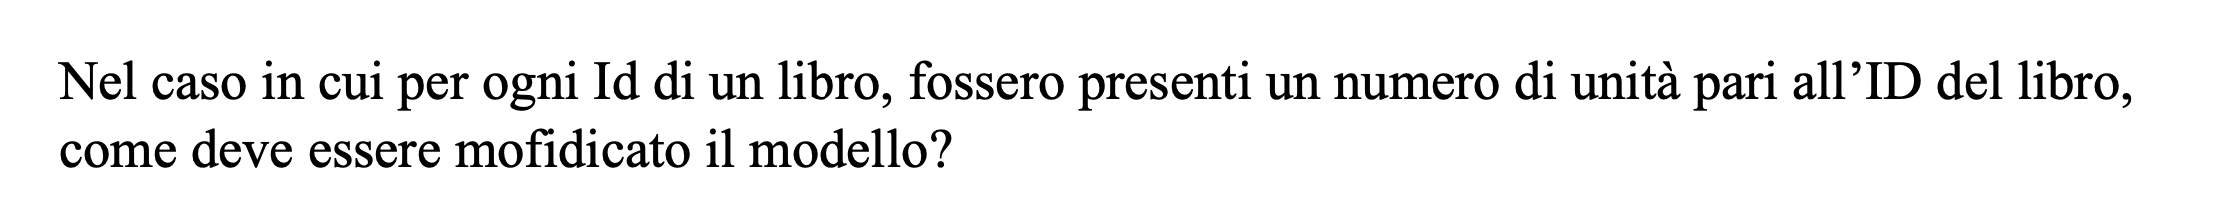

## DATI IN INGRESSO 
$$I = \{1....n\} \quad\quad\quad\quad \ \ insieme \ degli \ id \ dei \ libri \ (20)\\
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad \  J = \{1....m\} \quad\quad\quad\quad insieme \ massimo \ degli \ scaffali \ (210) \ \ (disponibilità \ del \ libro \ i = \ id(i))\\
b \ = \ \{b_1, \ b_2, \ ... \ ,b_n\}\quad \quad \quad(b_1=1, \ b_2=2, \ ... \ ,b_n=n)$$

## VARIABILI
\begin{equation}
   u_{ij} \ ->
   \begin{cases}
      1 \ se \ il \ libro \ i \ è \ situato \ sullo \ scaffale \ j \\
      0 \ altrimenti \\
   \end{cases}\\
   \\
   \\
   \\
y_j \quad-> \ altezza \ dello \ scaffale \ j\\
   \\
   \\
   \\
x_{ij} \quad-> \ qunatità \ di \ libri \ di \ tipologia \ i \ presenti \ sullo \ scaffale \ j\\
\end{equation}

## FORMULAZIONE

\begin{equation}
   min \sum_{j \in J} y_j\\
   s.t.  \\
   \sum_{j \in J} x_{ij} = b_i \quad \quad \forall \ i \in I \\
   \sum_{i \in I} l_i x_{ij} \leq 100 \quad \quad \forall \ j \in J \\
   x_{ij} u_{ij} \leq x_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
   u_{ij} \leq x_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
   y_j \geq a_i u_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
   y_{j+1} \leq y_j \quad \quad \forall \ j \in J \\
   y_j \geq 0 \quad \quad \quad \forall \ j \in J \\
   u_{ij}\in\{0,1\} \quad \quad \forall \ j \in J, \ i \in I \\
   x_{ij} \geq 0 \quad \quad \quad \forall \ j \in J, \ i \in I  \\
\end{equation}

In [15]:
file = open('esame.rtf','r')
filelines = file.readlines()

num_line = 1
line = filelines[num_line].split()
numlib = range(int(line[0]))
numscaf = range(210)

num_line = num_line + 2
SIZE = []
DISP = []
for i in numlib:
    SIZE_line = []
    line = filelines[num_line].split()
    DISP.append(int(line[0]))
    for j in range(1,3):
        SIZE_line.append(int(line[j]))
    SIZE.append(SIZE_line)
    num_line = num_line +1

In [16]:
import gurobipy as gp
from gurobipy import GRB

# Inizializza il modelo
mod = gp.Model('Richiesta2')

In [17]:
x = mod.addVars(numlib,numscaf, vtype = GRB.INTEGER, name = 'x')
y = mod.addVars(numscaf, vtype = GRB.CONTINUOUS, name = 'y')
u = mod.addVars(numlib, numscaf, vtype = GRB.BINARY, name = 'u')

### FUNZIONE OBIETTIVO
\begin{equation}
min \sum_{j \in J} y_j\\
\end{equation}

In [18]:
obj = mod.setObjective(gp.quicksum(y[j] for j in numscaf), GRB.MINIMIZE)

### VINCOLI SULLA DISPONIBILITA' DEI LIBRI
\begin{equation}
\sum_{j \in J} x_{ij} = b_i \quad \quad \forall \ i \in I \\
\end{equation}

In [19]:
mod.addConstrs(gp.quicksum(x[i,j] for j in numscaf) == DISP[i] for i in numlib)

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>}

### VINCOLI SULLA LARGHEZZA DEGLI SCAFFALI
\begin{equation}
   \sum_{i \in I} l_i x_{ij} \leq 100 \quad \quad \forall \ j \in J \\
\end{equation}

In [20]:
mod.addConstrs(gp.quicksum(SIZE[i][0]*x[i,j] for i in numlib) <= 100 for j in numscaf)

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

### VINCOLI SULL'ALTEZZA DEGLI SCAFFALI
\begin{equation}
   y_j \geq a_i u_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
\end{equation}

In [21]:
mod.addConstrs(y[j] >= SIZE[i][1]*u[i,j] for i in numlib for j in numscaf)

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

### VINCOLO CHE LEGA LA VARIABILE CONTINUA ALLA VARIABILE BINARIA
\begin{equation}
   x_{ij} u_{ij} \geq x_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
\end{equation}

In [22]:
mod.addConstrs(x[i,j]*u[i,j] >= x[i,j] for i in numlib for j in numscaf)

{(0, 0): <gurobi.QConstr Not Yet Added>,
 (0, 1): <gurobi.QConstr Not Yet Added>,
 (0, 2): <gurobi.QConstr Not Yet Added>,
 (0, 3): <gurobi.QConstr Not Yet Added>,
 (0, 4): <gurobi.QConstr Not Yet Added>,
 (0, 5): <gurobi.QConstr Not Yet Added>,
 (0, 6): <gurobi.QConstr Not Yet Added>,
 (0, 7): <gurobi.QConstr Not Yet Added>,
 (0, 8): <gurobi.QConstr Not Yet Added>,
 (0, 9): <gurobi.QConstr Not Yet Added>,
 (0, 10): <gurobi.QConstr Not Yet Added>,
 (0, 11): <gurobi.QConstr Not Yet Added>,
 (0, 12): <gurobi.QConstr Not Yet Added>,
 (0, 13): <gurobi.QConstr Not Yet Added>,
 (0, 14): <gurobi.QConstr Not Yet Added>,
 (0, 15): <gurobi.QConstr Not Yet Added>,
 (0, 16): <gurobi.QConstr Not Yet Added>,
 (0, 17): <gurobi.QConstr Not Yet Added>,
 (0, 18): <gurobi.QConstr Not Yet Added>,
 (0, 19): <gurobi.QConstr Not Yet Added>,
 (0, 20): <gurobi.QConstr Not Yet Added>,
 (0, 21): <gurobi.QConstr Not Yet Added>,
 (0, 22): <gurobi.QConstr Not Yet Added>,
 (0, 23): <gurobi.QConstr Not Yet Added>,
 (

### VINCOLI CHE OBBLIGANO LA VARIABILE BINARIA A ESSERE 0 QUANDO $x{ij}$ E' 0
\begin{equation}
   u_{ij} \leq x_{ij} \quad \quad \forall \ j \in J, \ i \in I \\
\end{equation}

In [23]:
mod.addConstrs(u[i,j]<= x[i,j] for i in numlib for j in numscaf)

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

### VINCOLI SULL'ORDINE DEGLI SCAFFALI
\begin{equation}
   y_{j+1} \leq y_j \quad \quad \forall \ j \in J \\
\end{equation}

In [24]:
mod.addConstrs((y[j+1])<= y[j] for j in range(209))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [25]:
mod.optimize()
if mod.status == GRB.OPTIMAL:
    print (mod.objval)
    mod.write('richiesta2.sol')
mod.write('richiesta2.lp')

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8839 rows, 8610 columns and 25618 nonzeros
Model fingerprint: 0xa1b5b06d
Model has 4200 quadratic constraints
Variable types: 210 continuous, 8400 integer (4200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve added 3780 rows and 0 columns
Presolve removed 0 rows and 210 columns
Presolve time: 0.06s
Presolved: 12619 rows, 8400 columns, 33178 nonzeros
Variable types: 0 continuous, 8400 integer (4200 binary)
Found heuristic solution: objective 5150.0000000

Root relaxation: objective 4.533333e+01, 7672 iterations, 0.25 seconds (0.75 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work

In [26]:
if mod.status == GRB.OPTIMAL:
    print("L'altezza della libreria è: ", mod.objval, "cm")
    print("Gli scaffali usati e le relative altezze sono:")
    for j in numscaf:
        if y[j].x > 0.5:
            print("Scaffale", j+1, "=", y[j].x, "cm")
    print ()
    print("Appartenenza libri-scaffali:")
    for i in numlib:
        for j in numscaf:
            if x[i,j].x > 0.5 :
                print("Ci sono",x[i,j].x,"libri di ID:",i+1,"sullo scaffale",j+1)


L'altezza della libreria è:  329.0 cm
Gli scaffali usati e le relative altezze sono:
Scaffale 1 = 25.0 cm
Scaffale 2 = 20.0 cm
Scaffale 3 = 19.0 cm
Scaffale 4 = 18.0 cm
Scaffale 5 = 18.0 cm
Scaffale 6 = 17.0 cm
Scaffale 7 = 17.0 cm
Scaffale 8 = 17.0 cm
Scaffale 9 = 16.0 cm
Scaffale 10 = 16.0 cm
Scaffale 11 = 16.0 cm
Scaffale 12 = 15.0 cm
Scaffale 13 = 15.0 cm
Scaffale 14 = 15.0 cm
Scaffale 15 = 15.0 cm
Scaffale 16 = 14.0 cm
Scaffale 17 = 14.0 cm
Scaffale 18 = 12.0 cm
Scaffale 19 = 10.0 cm
Scaffale 20 = 10.0 cm
Scaffale 21 = 10.0 cm

Appartenenza libri-scaffali:
Ci sono 1.0 libri di ID: 1 sullo scaffale 1
Ci sono 2.0 libri di ID: 2 sullo scaffale 1
Ci sono 3.0 libri di ID: 3 sullo scaffale 7
Ci sono 4.0 libri di ID: 4 sullo scaffale 4
Ci sono 1.0 libri di ID: 5 sullo scaffale 12
Ci sono 4.0 libri di ID: 5 sullo scaffale 13
Ci sono 2.0 libri di ID: 6 sullo scaffale 9
Ci sono 3.0 libri di ID: 6 sullo scaffale 10
Ci sono 1.0 libri di ID: 6 sullo scaffale 12
Ci sono 7.0 libri di ID: 7 sullo